In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r'dataset/Video_Games_Sales.csv', skipinitialspace=True)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df['User_Score'] = df['User_Score'].astype('float64', errors='ignore')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64', errors='ignore')
df['User_Count'] = df['User_Count'].astype('int64', errors='ignore')
df['Critic_Count'] = df['Critic_Count'].astype('int64', errors='ignore')
df = df.dropna()
df.shape

(6825, 16)

In [5]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


<AxesSubplot:xlabel='Year_of_Release'>

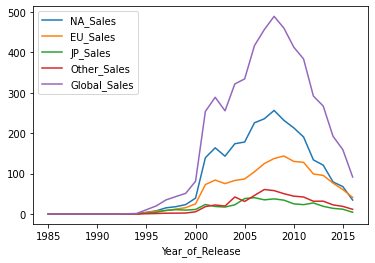

In [6]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

<AxesSubplot:xlabel='Year_of_Release'>

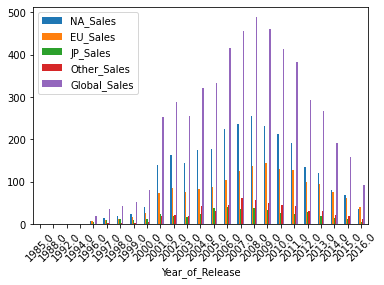

In [7]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

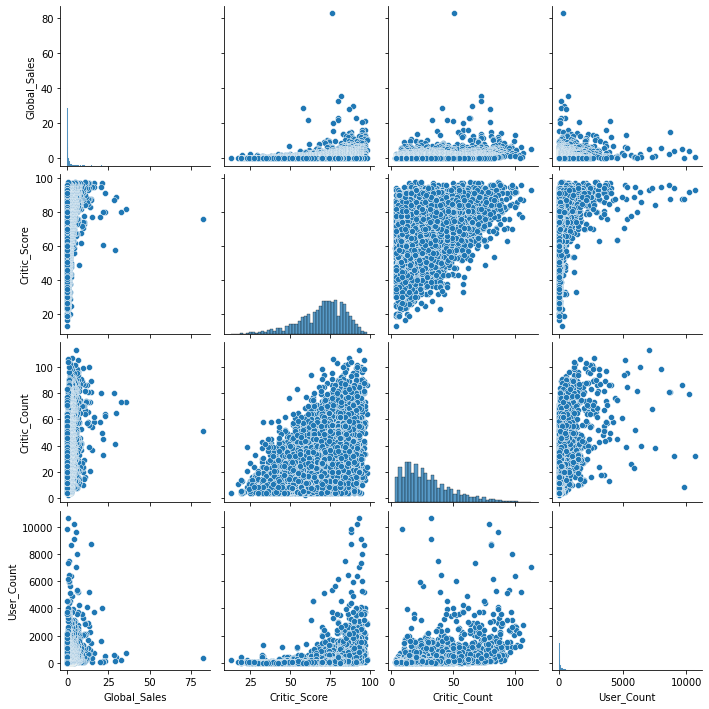

In [8]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
#sns_plot.savefig('pairplot.png')

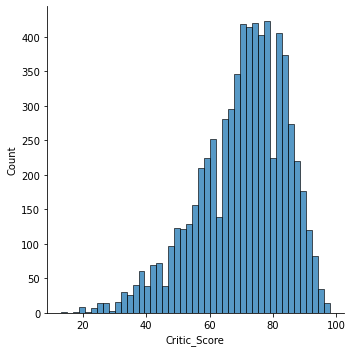

In [9]:
sns.displot(df.Critic_Score)

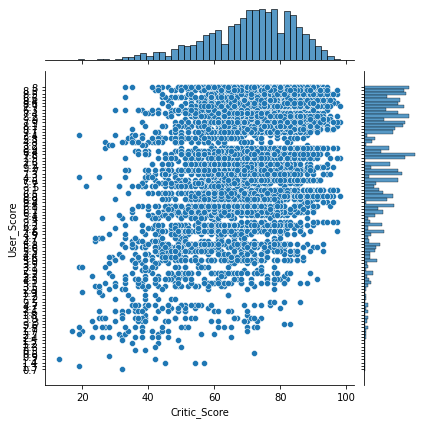

In [10]:
#df[['Critic_Score','User_Score']]
sns.jointplot(data=df, x='Critic_Score', y='User_Score')

<AxesSubplot:xlabel='Critic_Score', ylabel='Platform'>

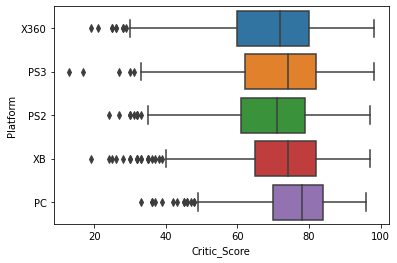

In [11]:
top_platforms = df['Platform'].value_counts(ascending=False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

<AxesSubplot:xlabel='Genre', ylabel='Platform'>

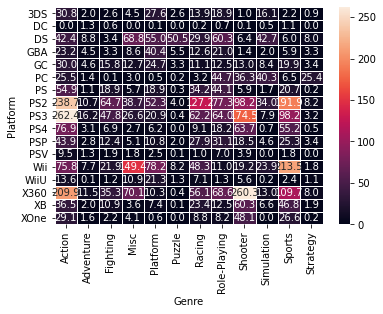

In [12]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

## Пример визуального анализа данных

In [17]:
df = pd.read_csv(r'../1_pandas_analysis/dataset/telecom_churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Посмотрим на распределение целевого класса – оттока клиентов.

In [19]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

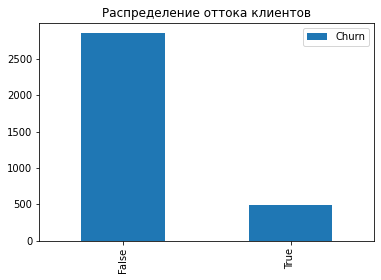

In [21]:
df['churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

Посмотрим на корреляции количественных признаков

<AxesSubplot:>

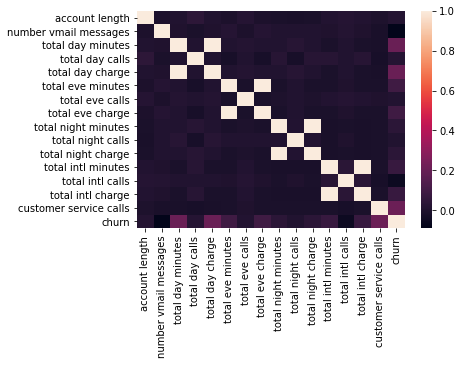

In [23]:
corr_matrix = df.drop(['state', 'international plan', 'voice mail plan',
                      'area code'], axis=1).corr()
sns.heatmap(corr_matrix)

Теперь посмотрим на распределения всех интересующих нас количественных признаков.

array([[<AxesSubplot:title={'center':'total night calls'}>,
        <AxesSubplot:title={'center':'total night charge'}>,
        <AxesSubplot:title={'center':'total day charge'}>,
        <AxesSubplot:title={'center':'account length'}>],
       [<AxesSubplot:title={'center':'total night minutes'}>,
        <AxesSubplot:title={'center':'total intl charge'}>,
        <AxesSubplot:title={'center':'total eve calls'}>,
        <AxesSubplot:title={'center':'customer service calls'}>],
       [<AxesSubplot:title={'center':'total day calls'}>,
        <AxesSubplot:title={'center':'total eve charge'}>,
        <AxesSubplot:title={'center':'total day minutes'}>,
        <AxesSubplot:title={'center':'area code'}>],
       [<AxesSubplot:title={'center':'number vmail messages'}>,
        <AxesSubplot:title={'center':'total eve minutes'}>,
        <AxesSubplot:title={'center':'total intl calls'}>,
        <AxesSubplot:title={'center':'total intl minutes'}>]],
      dtype=object)

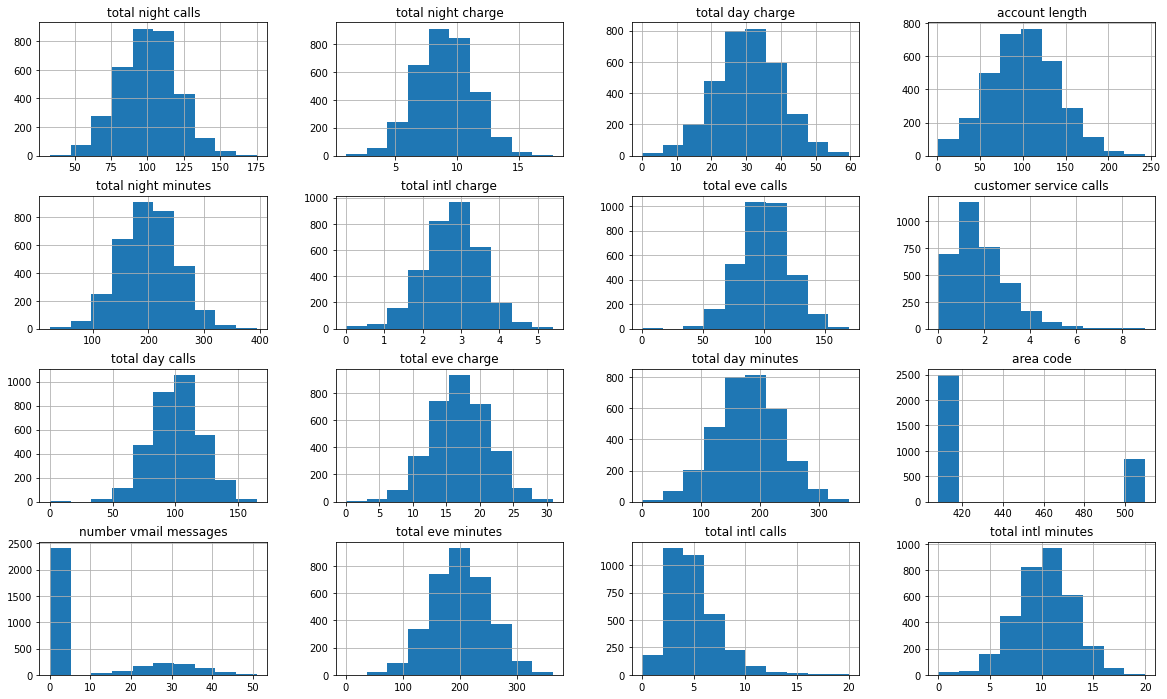

In [24]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12))

Дальше посмотрим, как признаки связаны с целевым – с оттоком.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


IndexError: index 3 is out of bounds for axis 0 with size 3

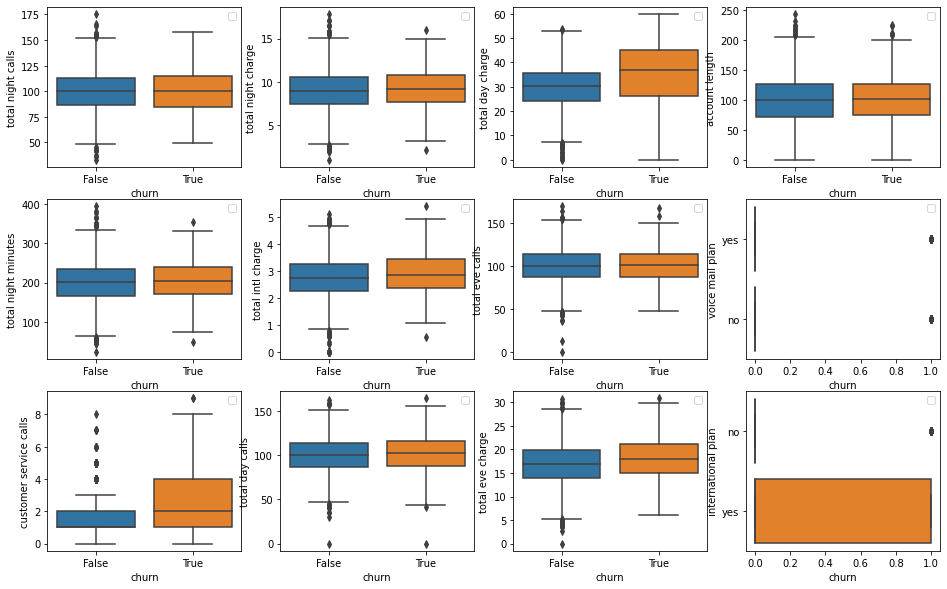

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='churn', y=feat, data=df, ax=axes[int(idx / 4), int(idx % 4)])
    axes[int(idx / 4), int(idx % 4)].legend()
    axes[int(idx / 4), int(idx % 4)].set_xlabel('churn')
    axes[int(idx / 4), int(idx % 4)].set_ylabel(feat)

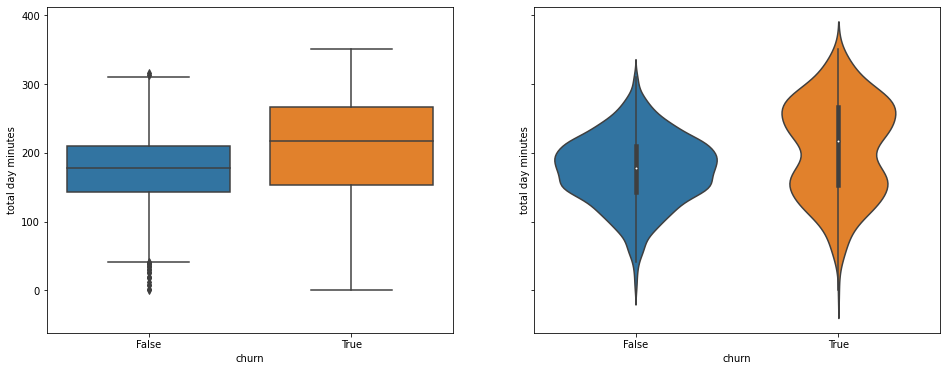

In [34]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1]);

<AxesSubplot:xlabel='customer service calls', ylabel='count'>

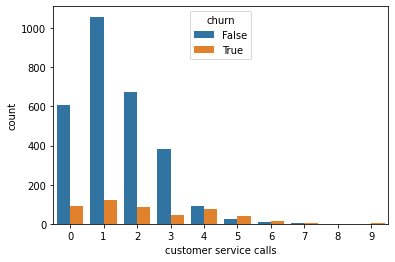

In [37]:
sns.countplot(x='customer service calls', hue='churn', data=df)

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

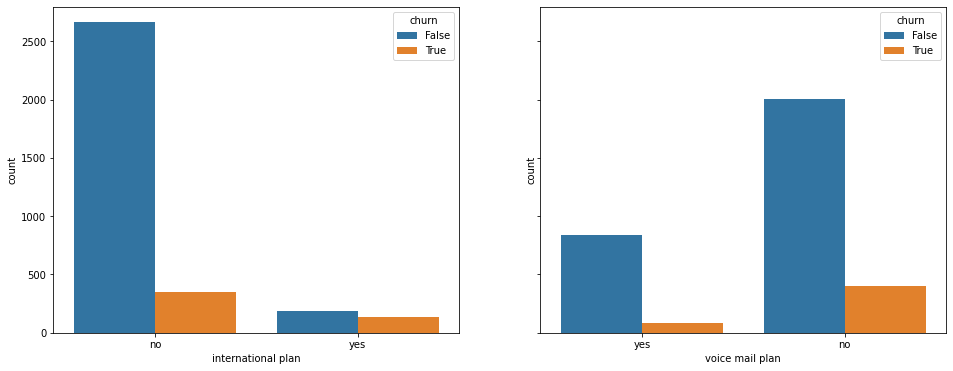

In [39]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0])
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1])

In [42]:
import numpy as np
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


## Подглядывание в n-мерное пространство с t-SNE

In [43]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [49]:
# преобразуем cсе признаки в числовые, выкинув штаты
X = df.drop(['churn', 'state', 'phone number'], axis=1)
X['international plan'] = pd.factorize(X['international plan'])[0]
X['voice mail plan'] = pd.factorize(X['voice mail plan'])[0]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

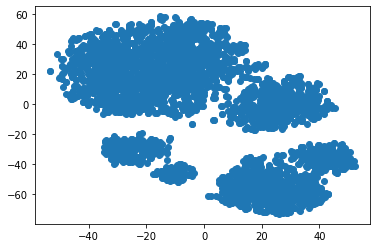

In [51]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\alexe\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


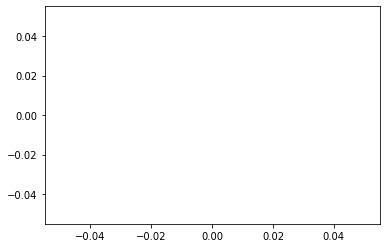

In [52]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['churn'].map({0: 'blue', 1: 'orange'}));